Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv'
walmart = pd.read_csv(data_url, header=0, sep = ',')

- state that has the `7th highest` total number of Walmart super stores
- city that has the `5th highest` total number of Walmart stores (super stores and regular stores combined)

In [4]:
#PART 1
print("which state has the 7th highest total number of Walmart super stores? \n")
super_store = walmart['type_store'].values == ['Supercenter']
tots = walmart[super_store]
high_7 = tots.groupby(['STRSTATE']).count()['type_store'].reset_index(name ='count')
print(high_7[high_7['count'] == high_7['count'].nlargest(7).iloc[-1]])

#PART 2
print("\n which city has the 5th highest total number of Walmart stores \n")
comb = walmart.groupby(['STRSTATE', 'STRCITY']).count()['type_store'].reset_index(name = 'count')
print(comb[comb['count'] == comb['count'].nlargest(5).iloc[-1]])

which state has the 7th highest total number of Walmart super stores? 

  STRSTATE  count
0       AL     76

 which city has the 5th highest total number of Walmart stores 

     STRSTATE    STRCITY  count
2170       TN  Knoxville      6


Define a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [5]:
def cum_sum(df, state):
    df1 = df[['MONTH', 'DAY','YEAR']].copy()
    df1 = pd.to_datetime(df1).reset_index(name = 'date')
#     df1['date'] = df1['date'].dt.strftime('%m-%d-%Y')
    date = df1['date']
    df = df.join(date)
    df.head()
    cumsum_store = df.groupby(['STRSTATE','date']).count()['type_store'].reset_index(name ='count')
    cumsum_store.sort_values(by='date')
    cumsum_store["cum_sum"]=cumsum_store.groupby(['STRSTATE'])['count'].cumsum(axis=0)
    cumsum_store = cumsum_store[['STRSTATE','date','cum_sum']].copy()
    fin = cumsum_store[cumsum_store['STRSTATE'] == state]
    fin = fin[['date','cum_sum']].copy()
    return fin

cum_sum(walmart, 'WY')



,date,cum_sum
2197,1989-12-30,1
2198,1990-04-02,2
2199,1990-06-27,3
2200,1990-08-01,5
2201,1990-10-29,6
2202,1991-01-30,7
2203,1991-12-31,8
2204,1992-04-01,9


Plot the time series of cumulative store count over time in the state of Idaho (ID).

<AxesSubplot: title={'center': 'Cumulative store count in IDAHO'}, xlabel='Date', ylabel='Cumulative Store Count'>

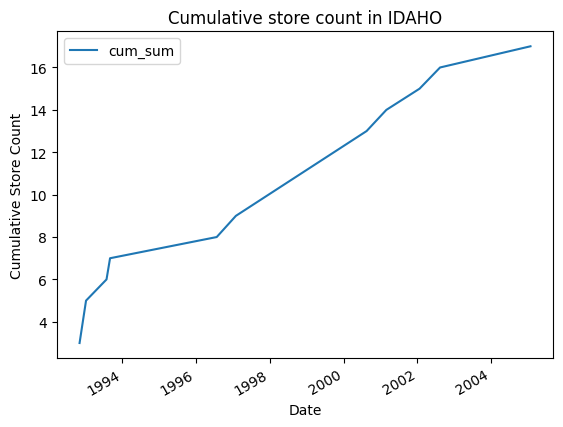

In [6]:
ID = cum_sum(walmart, 'ID')
ID.plot(x = 'date', y ='cum_sum', xlabel = 'Date', ylabel = 'Cumulative Store Count', title = 'Cumulative store count in IDAHO')

Plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

<BarContainer object of 5 artists>

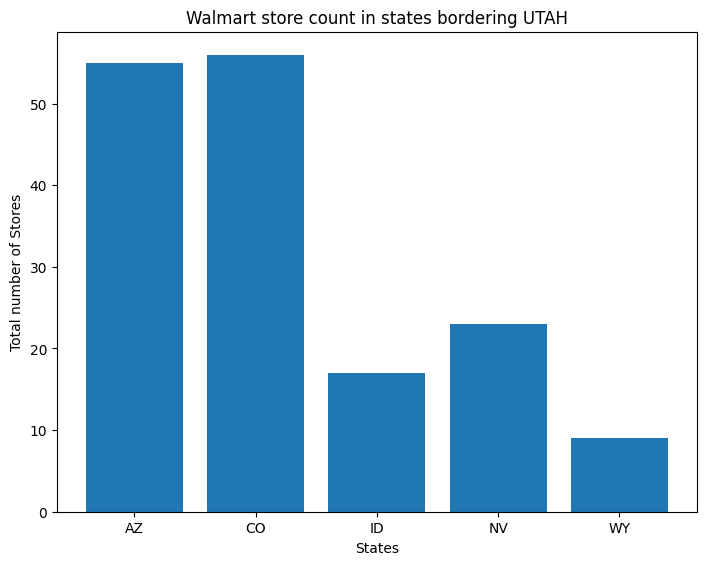

In [7]:
#choosing states bordering Utah
states = walmart.groupby(['STRSTATE']).count()['type_store'].reset_index(name ='count')
states = states.loc[states['STRSTATE'].isin(['WY','ID', 'NV', 'AZ', 'CO'])]
bar = plt.figure()
axis = bar.add_axes([0,0,1,1])
axis.set_xlabel("States")
axis.set_ylabel("Total number of Stores")
axis.set_title('Walmart store count in states bordering UTAH')
axis.bar(states['STRSTATE'],states['count'])